<a href="https://colab.research.google.com/github/JoongseokPark/machine_learning_2023/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_8%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##합성곱 신경망

- 이미지 분류에 사용됨
> 객체 분류등 특징을 구분하는데에 편리

- 사용처
>1.  이미지 분류 : 이미지가 나타내는 것 분류
>2. 객체 탐지 : 이미지 안에 있는 객체 위치 탐지
>3. 세그멘테이션 : 픽셀 단위로 객체 위치 탐지 


합성곱 연산

1. 3X3, 5X5등 커널의 크기를 정한다
2. 이미지 입력등에 커널의 크기만큼 범위를 정한 후 커널과 곱한다
3. 두개를 곱한 결과가 이미지의 특징을 나타내는 합성곱이 된다
4. 커널 안의 숫자를 가중치로 표현할 수 있다

- 스트라이드 : 커널이 건너뛰는 칸의 개수
- 패딩 : 합성곱 연산 후 행렬의 크기가 줄어드므로, 원본과 크기를 맞춰주는 과정
  

Pooling
- 합성곱, 활성화 함수등의 과정을 거친 결과 행렬의 특징을 강화시키는 과정
>예) 결과 행렬을 2X2로 범위를 나누어 그 범위 안의 최대값이나, 평균만을 뽑아내 사용한다

과대적합
- 모델이 훈련 데이터에 대해서만 높은 성능을 보이는 현상
- 실질적인 성능 감소이기 때문에 해결해야 한다

데이터 증강
- 과대적합을 해결하는 법
- 원본 입력을 상하좌우 반전, 채도 명도 변화, 위치 변화등의 차이를 주어서 입력과 비슷한 것들도 구분할 수 있음  

CNN 구조
1. 28X28 이미지 입력
2. 3X3 커널 32개와 합성곱 연산
> 32개의 26X26 채널 생성
3. 2X2 Pooling으로 13X13 32개 채널 생성
4. 출력 형태로 변환하여 출력  

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_exm,y_exm),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


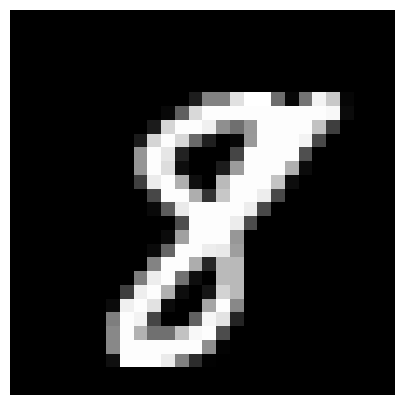

In [4]:
def plot_image(data, idx):
  plt.figure(figsize = (5,5))
  plt.imshow(data[idx],cmap = 'gray')
  plt.axis('off')
  plt.show()
plot_image(x_exm,55)

In [5]:
#정규화
x_exm = x_exm / x_exm.max()
x_test = x_test / x_test.max()

In [7]:
#흑백 색상 추가
x_exm_in = x_exm[...,tf.newaxis]
x_test_in = x_test[...,tf.newaxis]
print(x_exm_in.shape,x_test_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D((2,2), name = 'pool'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.summary()

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_exm,y_exm,validation_data=(x_test,y_test),epochs=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2127 - accuracy: 0.9392 - val_loss: 0.0839 - val_accuracy: 0.9762
Epoch 2/10
1875/1875 [==============

In [10]:
model.evaluate(x_test_in,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0653 - accuracy: 0.9799


[0.06534136086702347, 0.9799000024795532]

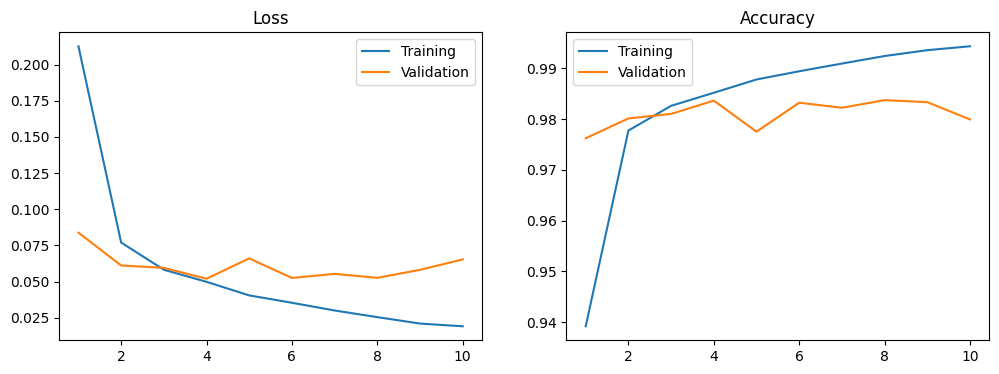

In [15]:
from matplotlib import axes
loss, val_loss = history.history['loss'],history.history['val_loss']
acc, val_acc = history.history['accuracy'],history.history['val_accuracy']
epoch = 10
fig,axes = plt.subplots(1,2,figsize = (12,4))

axes[0].plot(range(1,epoch+1),loss,label='Training')
axes[0].plot(range(1,epoch+1),val_loss,label='Validation')
axes[0].legend(loc = 'best')
axes[0].set_title('Loss')

axes[1].plot(range(1,epoch+1),acc,label='Training')
axes[1].plot(range(1,epoch+1),val_acc,label='Validation')
axes[1].legend(loc = 'best')
axes[1].set_title('Accuracy')

plt.show()

## 모델 구조 파악
1. 입력형태 : (28,28,1)
2. 출력형태 : (10)
3. 1st layer : Conv2D + weight(3,3,1,32) + bias(32) + output (26,26,1,32)
4. 2nd layer : Pooling (26,26,1,32)
5. 3rd layer : changing output into line array
6. 4th layer : OUTPUT 

In [17]:
#각 레이어 정보
model.layers

In [ ]:
#첫번째 레이어 Conv2D Weight : 3X3 * 32 = 280
model.layers[0].weights

In [20]:
#첫번째 레이어 bias : 32
model.layers[0].bias

<tf.Variable 'conv2d_1/bias:0' shape=(32,) dtype=float32, numpy=
array([-2.7279860e-01, -1.3351501e-02, -2.1596957e-02, -4.7975391e-01,
       -2.2211424e-01, -8.8502295e-02, -9.5789582e-02, -1.0143060e-02,
       -2.2218141e-01, -8.3479181e-02, -7.9958998e-03, -2.8880200e-01,
       -2.7268800e-01, -3.2278296e-01, -2.6285899e-01, -1.1915885e-01,
       -1.4089848e-01, -1.9867854e-01, -1.0792184e-02, -2.6948652e-01,
       -4.1920510e-01, -3.0476862e-01,  2.5802094e-01, -3.4202158e-01,
       -1.7209940e-02, -1.0986723e-02, -5.7998624e-02, -2.0816405e-01,
       -1.3951420e-02, -1.5116280e-01, -5.6051984e-02,  3.7788955e-04],
      dtype=float32)>

In [ ]:
#첫번째 레이어 커널 가중치
model.layers[0].kernel

In [24]:
#Conv2D, Pooling layer output
#Making Model : tf.keras.Model(input= , output= ,)
#Predicting Model : Model_name.predict()
activator = tf.keras.Model(inputs=model.input,outputs= [layer.output for layer in model.layers[:2]])

In [25]:
activations = activator.predict(x_exm_in[0][tf.newaxis, ...])
len(activations) #Layer has Conv2D and Pooling so its len is 2

1/1 [==============================] - 0s 95ms/step


2

In [26]:
conv = activations[0]
conv.shape
#32 channel of 26X26

(1, 26, 26, 32)

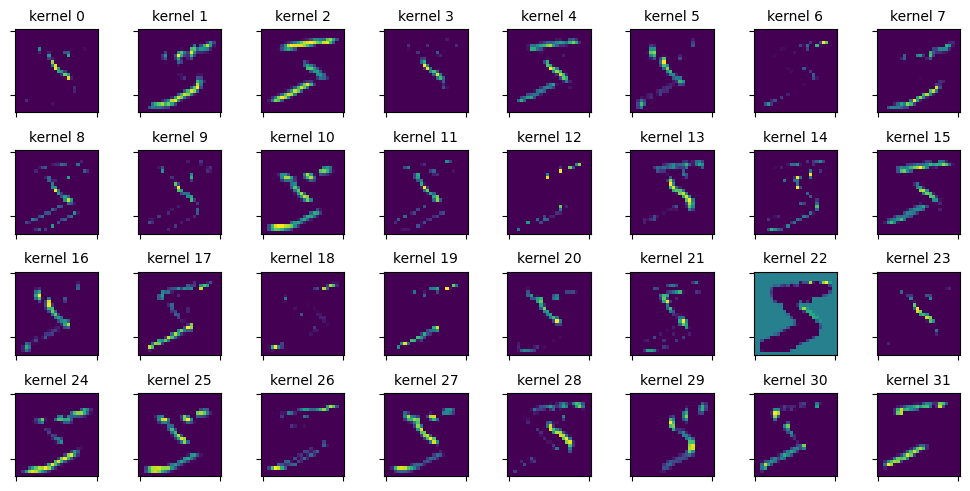

In [31]:
#visualization of First Layer
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  ax = axes[i//8, i%8]
  ax.imshow(conv[0,:,:,i],cmap='viridis')
  ax.set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8,i%8].get_xticklabels(),visible=False)
  plt.setp(axes[i//8,i%8].get_yticklabels(),visible=False)
plt.tight_layout()
plt.show()

In [29]:
pooling = activations[1]
pooling.shape
#32 channel of 13X13

(1, 13, 13, 32)

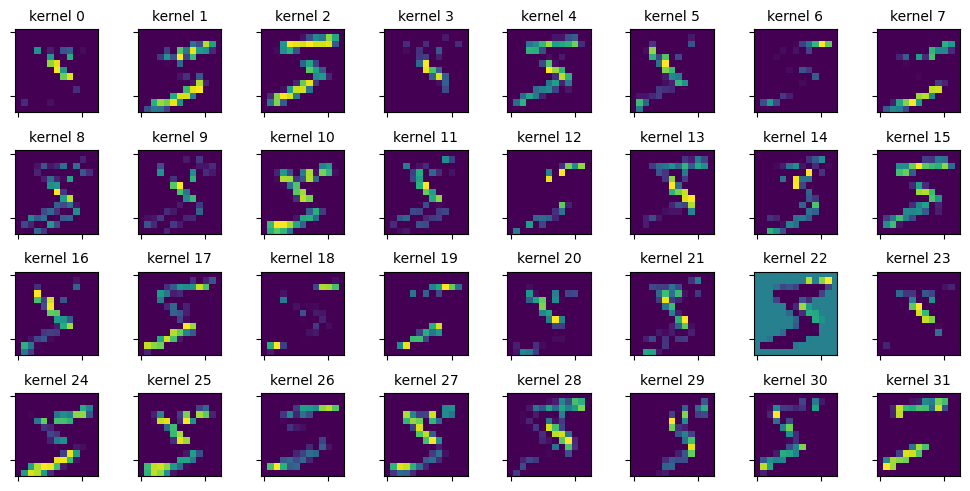

In [30]:
#visualization of Pooling Layer
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  ax = axes[i//8, i%8]
  ax.imshow(pooling[0,:,:,i],cmap='viridis')
  ax.set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8,i%8].get_xticklabels(),visible=False)
  plt.setp(axes[i//8,i%8].get_yticklabels(),visible=False)
plt.tight_layout()
plt.show()

##과제

R-CNN으로 이미지 안의 객체 구분하는 모델 만들기 